In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow as tf
from tensorflow.keras.datasets import cifar10

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Verify dataset shapes
print(f'Training data shape: {x_train.shape}, Training labels shape: {y_train.shape}')
print(f'Test data shape: {x_test.shape}, Test labels shape: {y_test.shape}')


Training data shape: (50000, 32, 32, 3), Training labels shape: (50000, 1)
Test data shape: (10000, 32, 32, 3), Test labels shape: (10000, 1)


In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()


C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 4, 4, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          65,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test), 
                    batch_size=64)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 66s 79ms/step - accuracy: 0.2624 - loss: 1.9783 - val_accuracy: 0.5019 - val_loss: 1.3775
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 78s 74ms/step - accuracy: 0.4669 - loss: 1.4674 - val_accuracy: 0.5323 - val_loss: 1.3241
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 76s 66ms/step - accuracy: 0.5286 - loss: 1.3200 - val_accuracy: 0.6012 - val_loss: 1.1151
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 57s 73ms/step - accuracy: 0.5662 - loss: 1.2235 - val_accuracy: 0.5990 - val_loss: 1.1020
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 60ms/step - accuracy: 0.5963 - loss: 1.1456 - val_accuracy: 0.6573 - val_loss: 0.9824
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 53s 67ms/step - accuracy: 0.6173 - loss: 1.0809 - val_accuracy: 0.6552 - val_loss: 0.9888
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 72ms/step - accuracy: 0.6376 - loss: 1.0453 - val_accuracy: 0.6502 - val_loss: 1.0000
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 62ms/step - accuracy: 0.6512 - loss: 1.0035 - 

In [4]:
from sklearn.metrics import classification_report, accuracy_score

# Predict the labels of the test set
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=1)
y_true = y_test.flatten()

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test accuracy: {accuracy}')

# Print classification report for precision, recall, and F1-score
print(classification_report(y_true, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
Test accuracy: 0.6937
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      1000
           1       0.83      0.81      0.82      1000
           2       0.60      0.59      0.60      1000
           3       0.48      0.51      0.49      1000
           4       0.65      0.62      0.64      1000
           5       0.54      0.65      0.59      1000
           6       0.86      0.65      0.74      1000
           7       0.71      0.75      0.73      1000
           8       0.81      0.82      0.81      1000
           9       0.74      0.82      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.70     10000
weighted avg       0.70      0.69      0.70     10000



In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

datagen.fit(x_train)

# Retrain the model with data augmentation
history = model.fit(datagen.flow(x_train, y_train, batch_size=64),
                    epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 86s 109ms/step - accuracy: 0.5173 - loss: 1.3728 - val_accuracy: 0.6642 - val_loss: 0.9576
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 106ms/step - accuracy: 0.5472 - loss: 1.3011 - val_accuracy: 0.6432 - val_loss: 1.0209
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 84s 107ms/step - accuracy: 0.5584 - loss: 1.2744 - val_accuracy: 0.6527 - val_loss: 0.9839
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 126ms/step - accuracy: 0.5698 - loss: 1.2487 - val_accuracy: 0.6469 - val_loss: 1.0338
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.5824 - loss: 1.2072 - val_accuracy: 0.6751 - val_loss: 0.9354
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.5823 - loss: 1.2104 - val_accuracy: 0.6747 - val_loss: 0.9369
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 130s 165ms/step - accuracy: 0.5919 - loss: 1.1778 - val_accuracy: 0.6770 - val_loss: 0.9296
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 135s 100ms/step - accuracy: 0.5973 - loss: 1.1738 - val

In [6]:
w_grid = 10
l_grid = 10
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

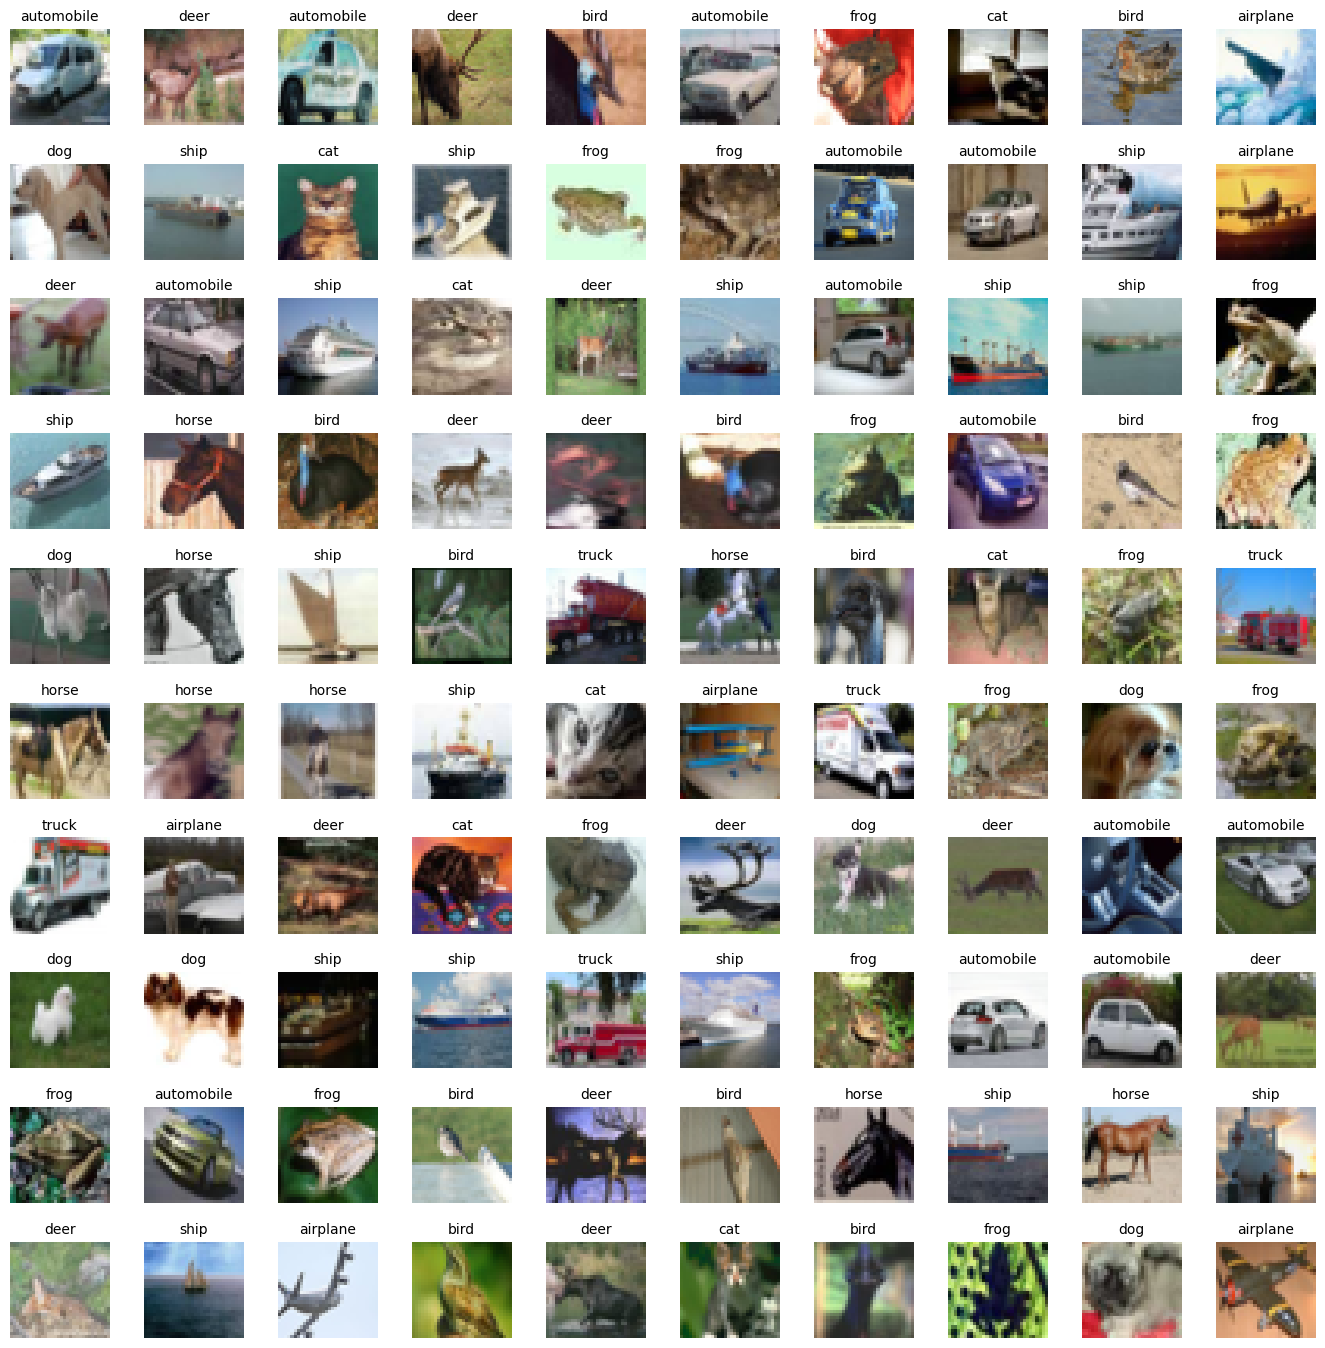

In [7]:
fig, axes = plt.subplots(l_grid, w_grid, figsize = (17,17))
axes = axes.ravel()
n_train = len(x_train)

for i in np.arange(0,w_grid*l_grid):
    index = np.random.randint(0,n_train)
    axes[i].imshow(x_train[index,1:])
    label_index = int(y_train[index])
    axes[i].set_title(labels[label_index], fontsize = 10)
    axes[i].axis('off')
plt.subplots_adjust(hspace = 0.4)

In [8]:
from flask import Flask, request, render_template_string
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import threading
import logging

app = Flask(__name__)

# Load the model
model = load_model('cnn_model.keras')

# HTML templates with CSS
index_html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Image Classification</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #e6f7ff;
            margin: 0;
        }
        .container {
            text-align: center;
            background: #ffffff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1 {
            color: #333333;
        }
        form {
            margin-top: 20px;
        }
        input[type="file"] {
            padding: 10px;
            border: 1px solid #dddddd;
            border-radius: 4px;
            background: #ffffff;
        }
        button {
            padding: 10px 20px;
            margin-top: 10px;
            background: #99ccff;
            border: none;
            color: #ffffff;
            border-radius: 4px;
            cursor: pointer;
        }
        button:hover {
            background: #80bfff;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Image Classification using CNN</h1>
        <form action="/predict" method="post" enctype="multipart/form-data">
            <input type="file" name="file" accept="image/*">
            <button type="submit">Predict</button>
        </form>
    </div>
</body>
</html>
"""

result_html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Prediction Result</title>
    <style>
        body {
            font-family: Arial, sans-serif;
            display: flex;
            justify-content: center;
            align-items: center;
            height: 100vh;
            background-color: #e6f7ff;
            margin: 0;
        }
        .container {
            text-align: center;
            background: #ffffff;
            padding: 20px;
            border-radius: 8px;
            box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
        }
        h1 {
            color: #333333;
        }
        p {
            font-size: 1.2em;
            color: #666666;
        }
        a {
            display: inline-block;
            margin-top: 20px;
            padding: 10px 20px;
            background: #99ccff;
            color: #ffffff;
            text-decoration: none;
            border-radius: 4px;
        }
        a:hover {
            background: #80bfff;
        }
    </style>
</head>
<body>
    <div class="container">
        <h1>Prediction Result</h1>
        <p>Predicted Class: {{ prediction }}</p>
        <a href="/">Classify another image</a>
    </div>
</body>
</html>
"""

@app.route('/')
def index():
    return render_template_string(index_html)

@app.route('/predict', methods=['POST'])
def predict():
    if request.method == 'POST':
        file = request.files['file']
        img = image.load_img(file, target_size=(32, 32))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        img = img / 255.0
        
        prediction = model.predict(img)
        class_idx = np.argmax(prediction)
        return render_template_string(result_html, prediction=class_idx)

# Run the Flask app in a separate thread
def run_app():
    logging.info("Starting Flask app")
    app.run(debug=False, use_reloader=False, port=5000)

if __name__ == '__main__':
    flask_thread = threading.Thread(target=run_app)
    flask_thread.start()
    logging.info("Flask app running in a separate thread")


C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 22 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug:127.0.0.1 - - [30/Jul/2024 22:32:18] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [30/Jul/2024 22:32:19] "GET /favicon.ico HTTP/1.1" 404 -
ERROR:__main__:Exception on /predict [POST]
Traceback (most recent call last):
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 1473, in wsgi_app
    response = self.full_dispatch_request()
               ^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 882, in full_dispatch_request
    rv = self.handle_user_exception(e)
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\vishn\AppData\Local\Programs\Python\Python311\Lib\site-packages\flask\app.py", line 880, in full_dispatch_request
    rv = se